In [ ]:
RamyasreeKuppam
700734078

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = pd.read_csv('CC.csv')


In [3]:
df.head(10)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
df.shape

(8950, 18)

In [5]:
df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [6]:
df.dropna( inplace=True)
df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
x = df.iloc[:,[1,2,3,4]]
y = df.iloc[:,-1]

In [11]:
nclusters = 3 
km = KMeans(n_clusters=nclusters)
km.fit(x)

KMeans(n_clusters=3)

In [12]:
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)

0.5987372215181463


In [14]:
pca_2=PCA(n_components=2)
principalComponents = pca_2.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf])
finalDf.head()


,principal component 1,principal component 2
0,-1519.404934,-1162.809767
1,-654.776475,1878.532567
2,170.034354,880.585061
3,-1340.329448,-405.600891
4,-52.724045,240.837189


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=0)

In [16]:
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(principalDf, y_cluster_kmeans)
print(score)

0.6091546768033651


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaler = scaler.transform(x)


In [21]:
pca_2=PCA(n_components=2)
principalComponents = pca_2.fit_transform(x_scaler)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf])
finalDf.head()

,principal component 1,principal component 2
0,-0.814645,0.524737
1,-0.316517,-0.737686
2,0.223757,-0.618113
3,-0.529764,-0.317865
4,0.000690,-0.472271


In [22]:
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(principalDf, y_cluster_kmeans)
print(score)

0.4132420625170882


In [23]:
df= pd.read_csv(r"pd_speech_features.csv")
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [24]:
df.shape

(756, 755)

In [25]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [26]:
X = df.drop('class',axis=1).values
y = df['class'].values

In [27]:
scaler = StandardScaler()
X_Scale = scaler.fit_transform(X)

In [28]:
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()


,principal component 1,principal component 2,principal component 3,class
0,-10.047372,1.471075,-6.846404,1
1,-10.637725,1.583749,-6.830978,1
2,-13.516185,-1.253543,-6.818699,1
3,-9.155084,8.833597,15.290890,1
4,-6.764470,4.611465,15.637109,1


In [30]:
from sklearn.svm import SVC, LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_Scale,y, test_size=0.3,random_state=0)

svc = SVC(max_iter=1000)

svc.fit(X_train, y_train)

Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, y_train) * 100, 2)

print("svm accuracy =", acc_svc)

svm accuracy = 91.68


In [31]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


df = pd.read_csv("iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(df.iloc[:,range(0,4)].values)

In [33]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['Species'].values)

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y)

In [35]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,9.423452,-0.513976,0
1,8.751900,-1.591678,0
2,8.973004,-1.068204,0
3,8.170186,-1.435135,0
4,9.249789,-0.136869,0


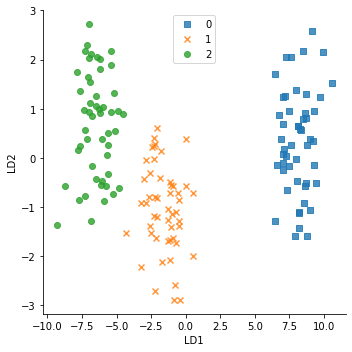

In [36]:
markers = ['s', 'x', 'o']
colors = ['r', 'b', 'g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend(loc='upper center')
plt.show()